In [1]:
import numpy as np
import matplotlib.pyplot as plt
import container_loading.cargo as clp

## The class `Space`
Given a set of boxes, we want to find all blocks that can fill the space.

In [3]:
space = clp.Space([5, 4, 0], [42, 27, 24])
B1 = clp.BoxType([19, 12, 8], [1,1,1])
B2 = clp.BoxType([5, 24, 20])
cargo = {B1:8, B2:4}  # we have 8 boxes of type B1 and 4 boxes of type B2
blocks = space.find_max_blocks(cargo)  # list of blocks of maximal size that fit into space
blocks

[4x2x1 8·12·19 (5 4 0),
 2x3x1 12·8·19 (5 4 0),
 1x3x2 19·8·12 (5 4 0),
 4x1x2 8·19·12 (5 4 0),
 1x2x3 19·12·8 (5 4 0),
 2x1x3 12·19·8 (5 4 0),
 4x1x1 5·24·20 (5 4 0),
 1x4x1 24·5·20 (5 4 0)]

Let us draw all these blocks:

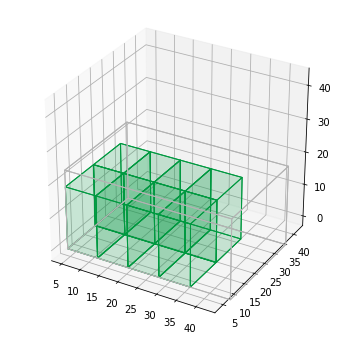

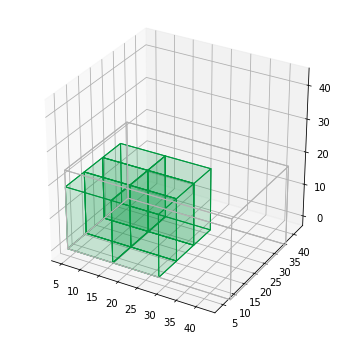

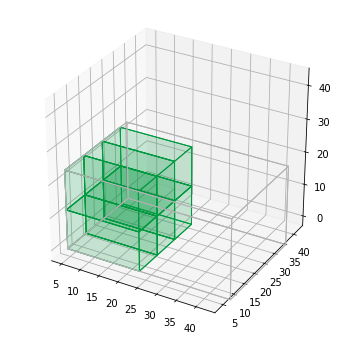

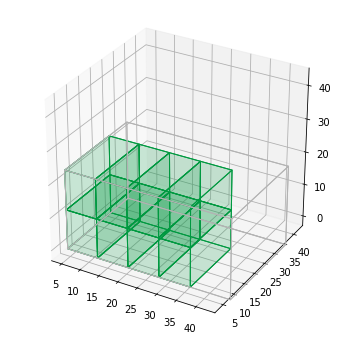

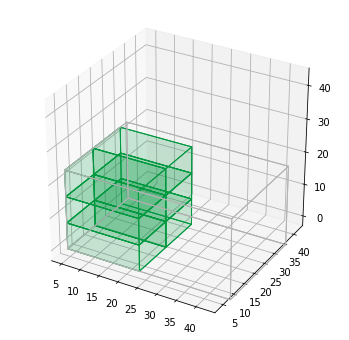

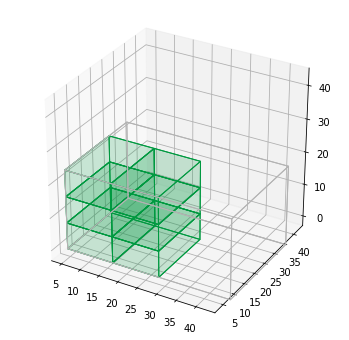

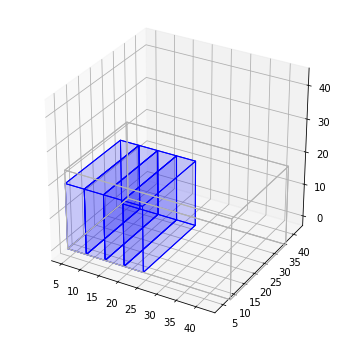

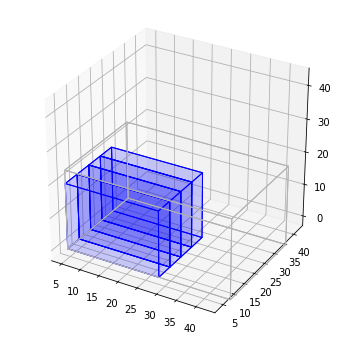

In [12]:
for block in blocks:
    fig = plt.figure(figsize=plt.figaspect(1)*1.5)
    ax = fig.gca(projection='3d')
    space.draw(ax)
    block.draw(ax)
plt.show()

Now, we choose the solution with the last block and we want to load it inside the space. Therefore, after loading this block of boxes into the space, 3 new spaces will be generated : the side space between the block and the space, the top space and a front space. The method `split` is used to update the space by loading the block:

In [17]:
new_spaces = space.split(blocks[-1])
new_spaces

[24·7·24 ( 5 24  0),
 24·20·4 ( 5  4 20),
 18·27·24 (29  4  0)]

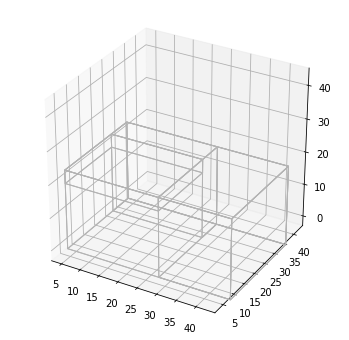

In [20]:
fig = plt.figure(figsize=plt.figaspect(1)*1.5)
ax = fig.gca(projection='3d')
space.draw(ax)
for s in new_spaces:
    s.draw(ax)
# blocks[-1].draw(ax)